In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LumFunc_miniJPAS import LumFunc
from perturbed_phot import perturb_phot
from my_functions import *
from colorplot import *

In [2]:
cat = load_noflag_cat('pkl/catalogDual_pz.pkl')

In [3]:
nb_ind = 11 # J0480
bb_ind = -3 # g

mask_fzero = (cat['MAG'][:, nb_ind] < 90) & (cat['MAG'][:, bb_ind] < 90)

nb_m = cat['MAG'][mask_fzero, nb_ind]
bb_m = cat['MAG'][mask_fzero, bb_ind]
nb_e = cat['ERR'][mask_fzero, nb_ind]
bb_e = cat['ERR'][mask_fzero, bb_ind]

# Define binning
m_min = 14
m_max = 26
m_bin_n = 75
x_e = np.linspace(m_min, m_max, m_bin_n)

# SNR=5 cut
bbcut = x_e[np.nanargmin(np.abs(m_err_bin(bb_m, bb_e, x_e, bb_m) - 0.24))]
nbcut = x_e[np.nanargmin(np.abs(m_err_bin(nb_m, nb_e, x_e, nb_m) - 0.24))]

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [4]:
n_lm = 50
total_sel = np.zeros(nb_m.shape)

w_pivot = central_wavelength(load_tcurves(load_filter_tags()))[nb_ind]
w_fwhm = nb_fwhm(load_tcurves(load_filter_tags()), nb_ind, True)
n_bins = 25
L_min = 40
L_max = 45

LF_y = np.zeros((n_lm, n_bins))
hist = np.zeros((n_lm, n_bins))

for i in range(n_lm):
    print('{}/{}'.format(str(i+1), str(n_lm), end='\r'))
    this_sel = perturb_phot(nb_m, nb_e, bb_m, bb_e,
                            30, nb_ind, 1, 
                            bbcut, nbcut,
                            False, False, False)
    idx = np.where(this_sel)
    f_line = mag_to_flux(nb_m[idx], w_pivot) - mag_to_flux(bb_m[idx], w_pivot)
    total_sel += this_sel
    x, y, h = LumFunc(f_line, w_pivot, w_fwhm, n_bins, L_min, L_max)
    LF_x = x
    LF_y[i] = y
    hist[i] = h

1/50
1/1
[0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 9, 8, 10, 12, 19, 22, 30, 49, 55, 45, 17, 2, 0, 0, 0]
2/50


/home/alberto/cosmos/fotometria/LumFunc_miniJPAS.py:11: RuntimeWarning: invalid value encountered in log10
  L_line = np.log10(L_line)


1/1
[0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 3, 8, 9, 16, 21, 36, 57, 53, 43, 12, 2, 0, 0, 0]
3/50
1/1
[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 5, 6, 12, 10, 25, 34, 36, 69, 51, 18, 2, 0, 0, 0]
4/50
1/1
[0, 0, 1, 0, 1, 1, 0, 0, 4, 4, 0, 3, 11, 3, 14, 16, 45, 43, 51, 39, 12, 2, 0, 0, 0]
5/50
1/1
[0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 2, 2, 6, 6, 16, 19, 42, 48, 45, 61, 15, 2, 0, 0, 0]
6/50
1/1
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 6, 8, 8, 13, 31, 36, 37, 57, 53, 21, 2, 0, 0, 0]
7/50
1/1
[0, 0, 0, 0, 2, 0, 1, 2, 2, 4, 6, 7, 12, 13, 17, 28, 32, 47, 50, 45, 19, 1, 0, 0, 0]
8/50
1/1
[0, 0, 1, 0, 1, 0, 0, 1, 1, 3, 5, 7, 8, 12, 15, 24, 24, 45, 63, 49, 16, 2, 0, 0, 0]
9/50
1/1
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 7, 10, 10, 21, 34, 47, 47, 53, 18, 2, 0, 0, 0]
10/50
1/1
[0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 6, 8, 5, 14, 24, 40, 41, 58, 41, 13, 2, 0, 0, 0]
11/50
1/1
[0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 4, 5, 11, 11, 20, 28, 34, 45, 62, 42, 11, 2, 0, 0, 0]
12/50


/home/alberto/cosmos/fotometria/LumFunc_miniJPAS.py:11: RuntimeWarning: divide by zero encountered in log10
  L_line = np.log10(L_line)


1/1
[0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 13, 9, 21, 31, 36, 55, 48, 52, 14, 2, 0, 0, 0]
13/50
1/1
[0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 2, 7, 13, 12, 14, 29, 35, 37, 48, 48, 15, 2, 0, 0, 0]
14/50
1/1
[0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 4, 6, 8, 11, 20, 31, 34, 51, 47, 44, 22, 2, 0, 0, 0]
15/50
1/1
[0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 4, 7, 10, 11, 15, 28, 29, 56, 57, 45, 17, 2, 0, 0, 0]
16/50
1/1
[0, 0, 0, 0, 0, 1, 2, 0, 1, 4, 5, 4, 5, 13, 10, 28, 26, 41, 52, 54, 12, 2, 0, 0, 0]
17/50
1/1
[0, 0, 0, 0, 1, 1, 1, 2, 1, 5, 6, 8, 6, 8, 14, 17, 42, 49, 45, 46, 13, 2, 0, 0, 0]
18/50
1/1
[0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 4, 3, 7, 9, 16, 18, 32, 41, 49, 48, 14, 2, 0, 0, 0]
19/50
1/1
[0, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 5, 10, 14, 13, 22, 40, 50, 54, 49, 14, 1, 0, 0, 0]
20/50
1/1
[0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 1, 9, 11, 10, 23, 35, 42, 50, 48, 18, 2, 0, 0, 0]
21/50
1/1
[0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 6, 4, 7, 8, 14, 30, 33, 43, 62, 42, 16, 2, 0, 0, 0]
22/50
1/1
[0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 6, 7, 8, 13, 14, 15, 34, 

In [12]:
x = LF_x
y = np.mean(LF_y, axis=0)
errors_total = np.sqrt(y)

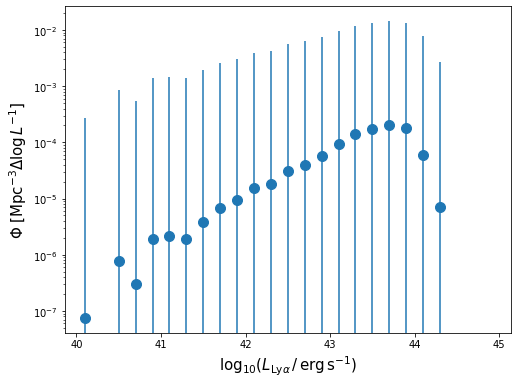

In [14]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x, y, '.', markersize=20)
ax.errorbar(x, y, yerr = errors_total, fmt='none')
ax.set_yscale('log')
ax.set_ylabel(r'$\Phi$ [Mpc$^{-3}\Delta\log L^{-1}$]', size=15)
ax.set_xlabel(r'$\log_{10}(L_{\mathrm{Ly}\alpha}\,/\,\mathrm{erg}\,\mathrm{s}^{-1})$', size=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


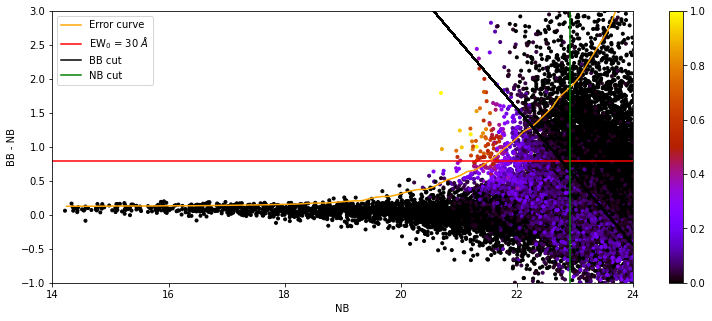

[]

In [15]:
weights = total_sel / n_lm
make_colorplot(cat, bb_ind, nb_ind, [], 'NB', False, weights)

[1, 18, 10, 1, 1]


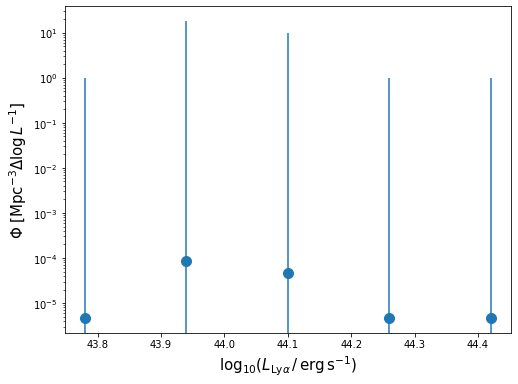

In [16]:
idx = np.where(weights >= 0.6)
f_line = mag_to_flux(nb_m[idx], w_pivot) - mag_to_flux(bb_m[idx], w_pivot)

x, y, h = LumFunc(f_line, w_pivot, w_fwhm, 5, 43.7, 44.5)

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x, y, '.', markersize=20)
ax.errorbar(x, y, yerr = errors, fmt='none')
ax.set_yscale('log')
ax.set_ylabel(r'$\Phi$ [Mpc$^{-3}\Delta\log L^{-1}$]', size=15)
ax.set_xlabel(r'$\log_{10}(L_{\mathrm{Ly}\alpha}\,/\,\mathrm{erg}\,\mathrm{s}^{-1})$', size=15)
plt.show()

In [ ]:
x,y